In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Load the Titanic dataset
data = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataset
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for missing values
data.isnull().sum()

# Get an overview of the data types
data.info()

# Basic statistics of the numerical columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Fill missing 'Age' values with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing 'Embarked' values with the mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop the 'Cabin' column if it exists (handling potential missing column)
data = data.drop('Cabin', axis=1, errors='ignore')

# Handle missing values in the 'Fare' column if any
data['Fare'] = data['Fare'].fillna(data['Fare'].median())


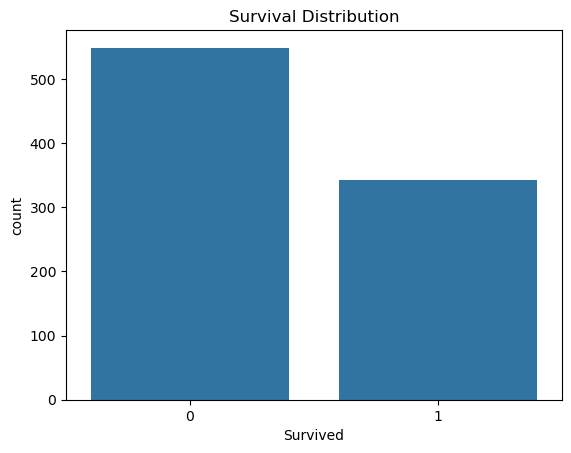

In [7]:
# Exploratory Data Analysis (EDA)

# Count of survivors vs non-survivors
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution')
plt.show()

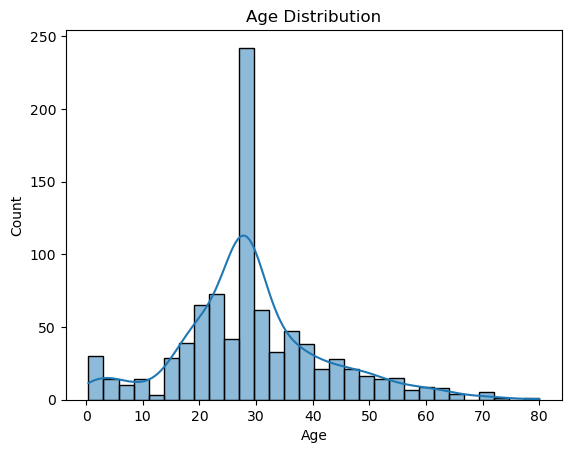

In [8]:
# Distribution of Age
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

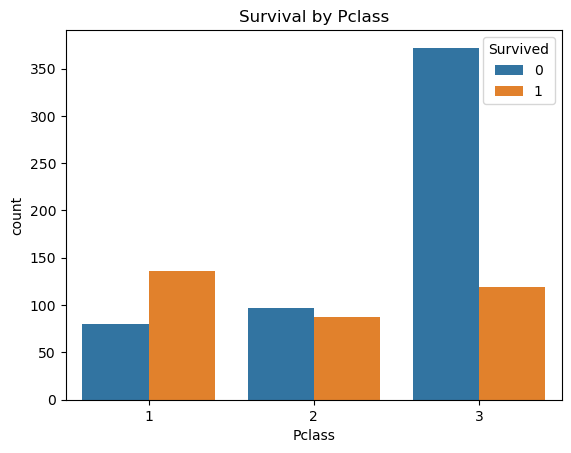

In [9]:
# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Pclass')
plt.show()

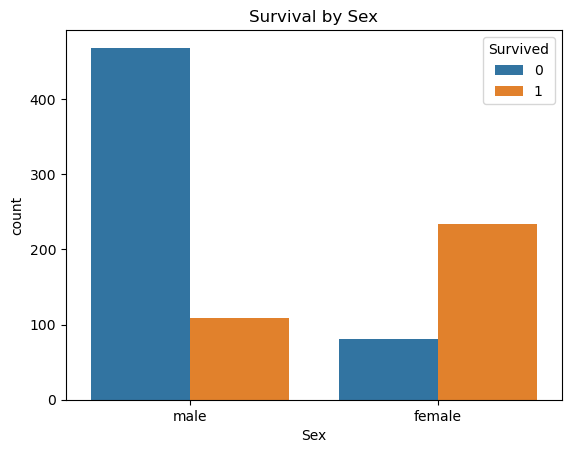

In [10]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Sex')
plt.show()

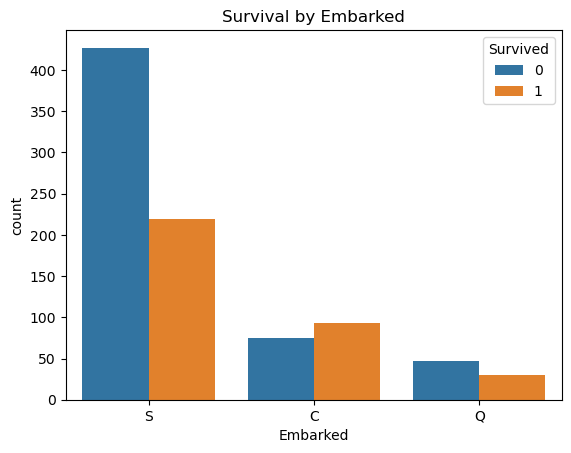

In [11]:
# Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival by Embarked')
plt.show()

In [12]:
# Feature Engineering
# Encode 'Sex' column as 0 (male) and 1 (female)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [13]:
# Encode 'Embarked' column as 0 (C), 1 (Q), and 2 (S)
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [14]:
# Drop the 'Name' and 'Ticket' columns as they may not be helpful for modeling
data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [15]:
# Split the dataset into features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

In [16]:
# Split into train and test subsets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8324


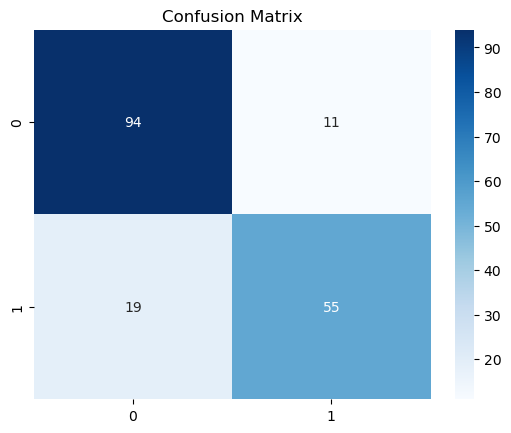

In [18]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [22]:
# Feature Importance
# Get feature importance from the trained model
feature_importances = model.feature_importances_

In [23]:
# Create a DataFrame to show feature importance
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

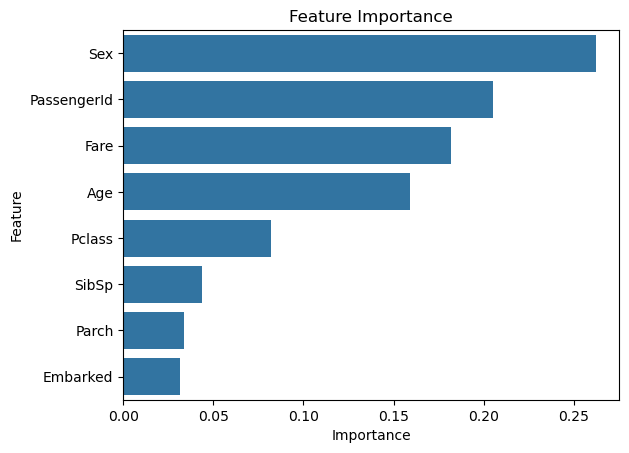

In [24]:
# Plot the feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [25]:
# Make predictions on the test data (X_test)
test_predictions = model.predict(X_test)

In [26]:
# Create a DataFrame with the predictions
test_submission = pd.DataFrame({
    'PassengerId': data.loc[X_test.index, 'PassengerId'],
    'Survived': test_predictions
})

In [27]:
# Save the predictions to a CSV file (for submission or further analysis)
test_submission.to_csv('titanic_predictions.csv', index=False)